In [1]:
import sys, os, importlib
from IPython.display import Image

In [2]:
sys.path.append(os.path.abspath('../'))

In [3]:
from wmhpypes.interfaces import ibbmTum
from wmhpypes.workflows import ibbmTum_wf

2021-09-08 20:16:09.866061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-08 20:16:09.866128: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
from nipype.pipeline.engine import Workflow, Node
from nipype import DataGrabber, DataSink, IdentityInterface, MapNode, JoinNode
from nipype.interfaces.io import BIDSDataGrabber, DataFinder

In [5]:
test_data_dir = os.path.abspath('../test_data')
weights_dir = os.path.join(test_data_dir, 'model_FLAIR_only')
out_dir = os.path.join(test_data_dir, 'results_FLAIR_only')
wf_work_dir = os.path.join(test_data_dir, 'wf_work_dir')

cores = 50

In [6]:
os.chdir(test_data_dir)

In [7]:
subs_list = ['sub-test']
template = {'flair': [['sub-id', 'sub-id', 'FLAIR.nii.gz']]}

In [8]:
weights_source = Node(interface=IdentityInterface(fields=['weights']), name='weights_source')
weights_source.inputs.weights = [os.path.abspath(os.path.join(weights_dir, i)) for i in os.listdir(weights_dir)]

In [9]:
data_source = Node(IdentityInterface(fields=['weights', 'sub-id']), name='data_source')
data_source.inputs.weights = [os.path.join(weights_dir, i) for i in os.listdir(weights_dir)]
data_source.iterables = ('sub-id', subs_list)

In [10]:
data_grabber = Node(
    interface=DataGrabber(infields=['sub-id'],
                          outfields=['flair']),
    name='data_grabber')
data_grabber.inputs.base_directory = test_data_dir
data_grabber.inputs.template = '%s/%s_%s'
data_grabber.inputs.template_args = template
data_grabber.inputs.sort_filelist = True

In [11]:
sink = Node(interface=DataSink(), name = 'sink')
sink.inputs.base_directory = out_dir

In [12]:
test_wf = ibbmTum_wf.get_test_wf()

In [13]:
# Connect to Workflow

In [14]:
wmh = Workflow(name='wmh', base_dir=wf_work_dir)

In [15]:
wmh.connect(data_source, 'sub-id', data_grabber, 'sub-id')
wmh.connect(data_source, 'weights', test_wf, 'inputspec.weights')
wmh.connect(data_grabber, 'flair', test_wf, 'inputspec.flair')
wmh.connect(test_wf, 'outputspec.wmh_mask', sink, '@pred')

210908-20:47:54,967 nipype.workflow INFO:
	 Generated workflow graph: /home/dellorcoa/Documents/DZNE/WMHpypes/test_data/wf_work_dir/wmh/graph.png (graph2use=colored, simple_form=True).


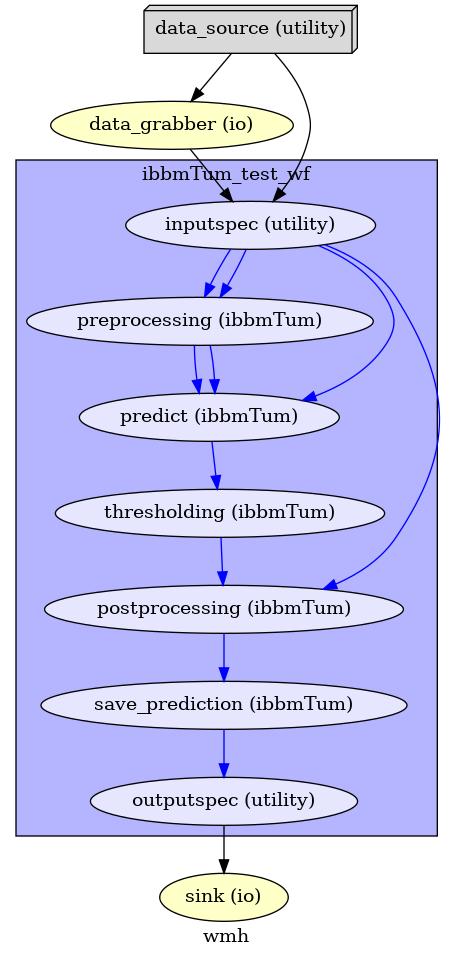

In [19]:
wmh.write_graph(graph2use='colored')
Image('./wf_work_dir/wmh/graph.png', width=200)

In [18]:
#wmh.run() #Single thread

plugin_args = {'n_procs': cores}
wmh.run(plugin='MultiProc', plugin_args=plugin_args)

210908-20:17:34,707 nipype.workflow INFO:
	 Workflow wmh settings: ['check', 'execution', 'logging', 'monitoring']
210908-20:17:34,721 nipype.workflow INFO:
	 Running in parallel.
210908-20:17:34,726 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 13.60/13.60, Free processors: 50/50.
210908-20:17:34,921 nipype.workflow INFO:
	 [Node] Outdated cache found for "wmh.data_grabber".
210908-20:17:34,936 nipype.workflow INFO:
	 [Node] Setting-up "wmh.data_grabber" in "/home/dellorcoa/Documents/DZNE/WMHpypes/test_data/wf_work_dir/wmh/_sub-id_sub-test/data_grabber".
210908-20:17:34,941 nipype.workflow INFO:
	 [Node] Outdated cache found for "wmh.data_grabber".
210908-20:17:34,949 nipype.workflow INFO:
	 [Node] Running "data_grabber" ("nipype.interfaces.io.DataGrabber")
210908-20:17:34,956 nipype.workflow INFO:
	 [Node] Finished "wmh.data_grabber".
210908-20:17:36,728 nipype.workflow INFO:
	 [Job 0] Completed (wmh.data_grabber).
210908-20:17:36,734 nipype

2021-09-08 20:17:40.686171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-08 20:17:40.686270: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-08 20:17:40.686305: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dd-ll-wirth01): /proc/driver/nvidia/version does not exist
2021-09-08 20:17:40.686921: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/dellorcoa/anaconda3/envs/wmhpypes/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: U

48/48 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 7s 136ms/step
210908-20:18:03,92 nipype.workflow INFO:
	 [Node] Finished "wmh.ibbmTum_test_wf.predict".
210908-20:18:04,755 nipype.workflow INFO:
	 [Job 2] Completed (wmh.ibbmTum_test_wf.predict).
210908-20:18:04,760 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 13.60/13.60, Free processors: 50/50.
210908-20:18:05,73 nipype.workflow INFO:
	 [Job 3] Cached (wmh.ibbmTum_test_wf.thresholding).
210908-20:18:07,81 nipype.workflow INFO:
	 [Node] Outdated cache found for "wmh.ibbmTum_test_wf.postprocessing".
210908-20:18:07,224 nipyp